In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [ ]:
os.listdir('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset')

In [ ]:
im =Image.open('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

In [ ]:
im =Image.open('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [ ]:
yes=os.listdir('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/yes')
no=os.listdir('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/no')

In [ ]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

In [ ]:
len(data_target)==len(data)

In [ ]:
data_target

In [ ]:
data

In [ ]:
yes_values=os.listdir('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/yes')
no_values=os.listdir('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/no')

In [ ]:
X_data =[]
for file in yes_values:
    img = cv2.imread('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/yes/'+file)
    face = cv2.resize( img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
#X_data =[]
for file in no_values:
    img = cv2.imread('C:/Users/SRIDHARAN/mlintern/input/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
len(X_data)==len(data)==len(data_target)

In [ ]:
X = np.squeeze(X_data)

In [ ]:
X.shape

In [ ]:
X = X.astype('float32')
X /= 255

In [ ]:
data_target

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [34]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=100,
         validation_data=(x_valid, y_valid),)

Epoch 1/100
2/2 [==============================] - 2s 933ms/step - loss: 0.0079 - acc: 1.0000 - val_loss: 3.3573 - val_acc: 0.6825
Epoch 2/100
2/2 [==============================] - 1s 405ms/step - loss: 8.0241e-04 - acc: 1.0000 - val_loss: 3.3349 - val_acc: 0.6825
Epoch 3/100
2/2 [==============================] - 1s 551ms/step - loss: 6.9736e-04 - acc: 1.0000 - val_loss: 3.3192 - val_acc: 0.6667
Epoch 4/100
2/2 [==============================] - 1s 414ms/step - loss: 6.7372e-04 - acc: 1.0000 - val_loss: 3.3118 - val_acc: 0.6667
Epoch 5/100
2/2 [==============================] - 1s 519ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.3533 - val_acc: 0.6667
Epoch 6/100
2/2 [==============================] - 1s 385ms/step - loss: 0.0066 - acc: 0.9947 - val_loss: 3.3281 - val_acc: 0.6667
Epoch 7/100
2/2 [==============================] - 1s 469ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 3.3899 - val_acc: 0.6667
Epoch 8/100
2/2 [==============================] - 1s 537ms/step - loss

2/2 [==============================] - 1s 684ms/step - loss: 0.0077 - acc: 0.9947 - val_loss: 2.6845 - val_acc: 0.6984
Epoch 64/100
2/2 [==============================] - 2s 782ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.3542 - val_acc: 0.7460
Epoch 65/100
2/2 [==============================] - 1s 669ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.1252 - val_acc: 0.7460
Epoch 66/100
2/2 [==============================] - 1s 345ms/step - loss: 0.0075 - acc: 0.9947 - val_loss: 2.1670 - val_acc: 0.7460
Epoch 67/100
2/2 [==============================] - 1s 418ms/step - loss: 0.0171 - acc: 0.9947 - val_loss: 2.3695 - val_acc: 0.7302
Epoch 68/100
2/2 [==============================] - 1s 344ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.6366 - val_acc: 0.6984
Epoch 69/100
2/2 [==============================] - 1s 361ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.9434 - val_acc: 0.6667
Epoch 70/100
2/2 [==============================] - 1s 520ms/step - loss: 0.0029 - acc: 1

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.682539701461792


In [ ]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

# Sample Prediction

2/2 [==============================] - 0s 23ms/step


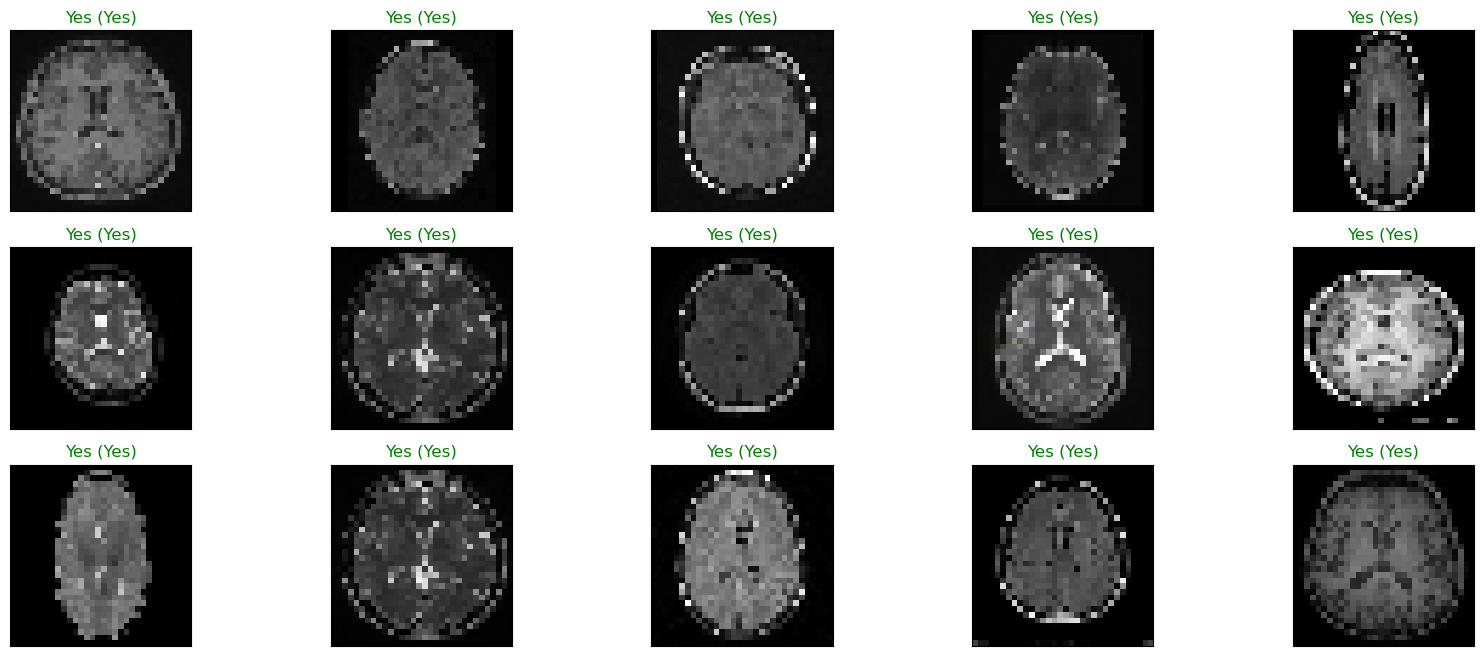

In [36]:
y_hat = model.predict(x_test)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
from flask import Flask, render_template, request
from werkzeug.utils import secure_filename
import tensorflow as tf
import numpy as np
from PIL import Image

app = Flask(_name_)

# Load your trained model
model = tf.keras.models.load_model('C:/Users/SRIDHARAN/mlintern')

@app.route('/')
def upload_file():
   return render_template('upload.html')

@app.route('/uploader', methods = ['GET', 'POST'])
def upload_image_file():
   if request.method == 'POST':
      img = Image.open(request.files['file'].stream).convert("RGB")
      img = img.resize((64,64)) # use the same size as you used during model training
      img_array = np.array(img) / 255.0 # model expects input in range 0 - 1
      img_array = np.expand_dims(img_array, axis=0) # expand dims to match the input size of model
      prediction = model.predict(img_array) # get prediction
      tumor_present = np.argmax(prediction) == 1 # assuming tumor class is 1

      return 'Tumor detected!' if tumor_present else 'No tumor detected.'
		
if _name_ == '_main_':
   app.run(debug=True)